In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
import math
from dateutil.relativedelta import relativedelta
import calendar
import holidays
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

In [2]:

df_vol = pd.read_excel('/Users/jacky/Python Shit/Trading/4370 project/S&P500_10Y_HP_IVOL_Delta.xlsx', index_col=0)

df_price = pd.read_excel('/Users/jacky/Python Shit/Trading/4370 project/S&P500_10Y_HP_HP.xlsx', index_col=0)
df_expiration_date = pd.read_excel('/Users/jacky/Python Shit/Trading/4370 project/Contract_expiration.xlsx')
df_earning_date_short = pd.read_csv('/Users/jacky/Python Shit/Trading/4370 project/Earning Date SC.csv')
df_earning_date_long = pd.read_csv('/Users/jacky/Python Shit/Trading/4370 project/Earning Date LC.csv')
df_interest_rate = pd.read_excel('/Users/jacky/Python Shit/Trading/4370 project/Interest_rate.xlsx')
df_dividend = pd.read_excel('/Users/jacky/Python Shit/Trading/4370 project/Dividend_yield.xlsx')

df_expiration_date = pd.to_datetime(df_expiration_date['Contract_expiration'])



In [4]:
# Short data
selected_symbol_short = ['ACN US EQUITY', 'ADBE US EQUITY', 'AMAT US EQUITY', 'ANET US EQUITY', 'AXP US EQUITY', 'BK US EQUITY', 'BLK US EQUITY', 'C US EQUITY', 'CSCO US EQUITY', 'CSX US EQUITY', 'HON US EQUITY', 'IBM US EQUITY', 'LOW US EQUITY', 'MS US EQUITY', 'NFLX US EQUITY', 'NKE US EQUITY', 'NVDA US EQUITY', 'PM US EQUITY', 'TGT US EQUITY', 'TJX US EQUITY', 'UNH US EQUITY', 'USB US EQUITY']

selected_price_short = df_price[selected_symbol_short]
selected_vol_short= df_vol[selected_symbol_short]

selected_price_short.reset_index(inplace=True)
selected_vol_short.reset_index(inplace=True)

selected_price_short['index'] = pd.to_datetime(selected_price_short['index'])
selected_vol_short['index'] = pd.to_datetime(selected_vol_short['index'])

#Rename the symbol
selected_price_short = selected_price_short.rename(columns={'index' : 'time',
                                                'ACN US EQUITY'    : 'ACN',
                                                'ADBE US EQUITY'    : 'ADBE',
                                                'AMAT US EQUITY'    : 'AMAT',
                                                'ANET US EQUITY'    : 'ANET',
                                                'AXP US EQUITY'     : 'AXP',
                                                'BK US EQUITY' : 'BK',
                                                'BLK US EQUITY'    : 'BLK',
                                                'C US EQUITY'    : 'C',
                                                'CSCO US EQUITY'    : 'CSCO',
                                                'CSX US EQUITY'    : 'CSX',
                                                'HON US EQUITY'    : 'HON',
                                                'IBM US EQUITY'     : 'IBM',
                                                'LOW US EQUITY'     : 'LOW',
                                                'MS US EQUITY'    : 'MS',
                                                'NFLX US EQUITY'    : 'NFLX',
                                                'NKE US EQUITY'    : 'NKE',
                                                'NVDA US EQUITY'    : 'NVDA',
                                                'PM US EQUITY'    : 'PM',
                                                'TGT US EQUITY'    : 'TGT',
                                                'TJX US EQUITY'    : 'TJX',
                                                'UNH US EQUITY'    : 'UNH',
                                                'USB US EQUITY'    : 'USB'})

selected_vol_short = selected_vol_short.rename(columns={'index' : 'time',
                                                'ACN US EQUITY'    : 'ACN',
                                                'ADBE US EQUITY'    : 'ADBE',
                                                'AMAT US EQUITY'    : 'AMAT',
                                                'ANET US EQUITY'    : 'ANET',
                                                'AXP US EQUITY'     : 'AXP',
                                                'BK US EQUITY' : 'BK',
                                                'BLK US EQUITY'    : 'BLK',
                                                'C US EQUITY'    : 'C',
                                                'CSCO US EQUITY'    : 'CSCO',
                                                'CSX US EQUITY'    : 'CSX',
                                                'HON US EQUITY'    : 'HON',
                                                'IBM US EQUITY'     : 'IBM',
                                                'LOW US EQUITY'     : 'LOW',
                                                'MS US EQUITY'    : 'MS',
                                                'NFLX US EQUITY'    : 'NFLX',
                                                'NKE US EQUITY'    : 'NKE',
                                                'NVDA US EQUITY'    : 'NVDA',
                                                'PM US EQUITY'    : 'PM',
                                                'TGT US EQUITY'    : 'TGT',
                                                'TJX US EQUITY'    : 'TJX',
                                                'UNH US EQUITY'    : 'UNH',
                                                'USB US EQUITY'    : 'USB'})

# Extract data from the previous earnings report 
df_earning_date_short['Earnings Date'] = pd.to_datetime(df_earning_date_short['Earnings Date'])
df_earning_date_short = df_earning_date_short[df_earning_date_short['Earnings Date'] <= pd.Timestamp("2024-11-05")]
df_earning_date_short = df_earning_date_short[df_earning_date_short['Earnings Date'] >= pd.Timestamp("2021-11-08")]
df_earning_date_short = df_earning_date_short.sort_values(by='Earnings Date')


/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/1491151239.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_price_short['index'] = pd.to_datetime(selected_price_short['index'])
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/1491151239.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_vol_short['index'] = pd.to_datetime(selected_vol_short['index'])


In [140]:
selected_symbol_long = [ 'ACN US EQUITY', 'ADBE US EQUITY', 'ANET US EQUITY', 'AXP US EQUITY', 'BK US EQUITY', 'DE US EQUITY', 'FDX US EQUITY', 'IBM US EQUITY', 'MS US EQUITY', 'PANW US EQUITY', 'PM US EQUITY', 'SLB US EQUITY', 'SNPS US EQUITY', 'USB US EQUITY', 'WMT US EQUITY']
selected_price_long = df_price[selected_symbol_long]
selected_vol_long = df_vol[selected_symbol_long]

selected_price_long.reset_index(inplace=True)
selected_vol_long.reset_index(inplace=True)

selected_price_long['index'] = pd.to_datetime(selected_price_long['index'])
selected_vol_long['index'] = pd.to_datetime(selected_vol_long['index'])

#Rename the symbol
selected_price_long = selected_price_long.rename(columns={'index' : 'time',
                                                'ACN US EQUITY'    : 'ACN',
                                                'ADBE US EQUITY'    : 'ADBE',
                                                'ANET US EQUITY'    : 'ANET',
                                                'AXP US EQUITY'     : 'AXP',
                                                'BK US EQUITY'    : 'BK',
                                                'DE US EQUITY'    : 'DE',
                                                'FDX US EQUITY'    : 'FDX',
                                                'IBM US EQUITY'     : 'IBM',
                                                'MS US EQUITY'    : 'MS',
                                                'PANW US EQUITY'    : 'PANW',
                                                'PM US EQUITY'    : 'PM',
                                                'SLB US EQUITY'    : 'SLB',
                                                'SNPS US EQUITY'    : 'SNPS',
                                                'USB US EQUITY'    : 'USB',
                                                'WMT US EQUITY'    : 'WMT'})

selected_vol_long = selected_vol_long.rename(columns={'index' : 'time',
                                            'ACN US EQUITY'    : 'ACN',
                                            'ADBE US EQUITY'    : 'ADBE',
                                            'ANET US EQUITY'    : 'ANET',
                                            'AXP US EQUITY'     : 'AXP',
                                            'BK US EQUITY'    : 'BK',
                                            'DE US EQUITY'    : 'DE',
                                            'FDX US EQUITY'    : 'FDX',
                                            'IBM US EQUITY'     : 'IBM',
                                            'MS US EQUITY'    : 'MS',
                                            'PANW US EQUITY'    : 'PANW',
                                            'PM US EQUITY'    : 'PM',
                                            'SLB US EQUITY'    : 'SLB',
                                            'SNPS US EQUITY'    : 'SNPS',
                                            'USB US EQUITY'    : 'USB',
                                            'WMT US EQUITY'    : 'WMT'})

# Extract data from the previous earnings report 
df_earning_date_long['Earnings Date'] = pd.to_datetime(df_earning_date_long['Earnings Date'])
df_earning_date_long = df_earning_date_long[df_earning_date_long['Earnings Date'] <= pd.Timestamp("2024-11-05")]
df_earning_date_long = df_earning_date_long[df_earning_date_long['Earnings Date'] >= pd.Timestamp("2021-11-08")]
df_earning_date_long = df_earning_date_long.sort_values(by='Earnings Date')


/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/1892229316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_price_long['index'] = pd.to_datetime(selected_price_long['index'])
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/1892229316.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_vol_long['index'] = pd.to_datetime(selected_vol_long['index'])


In [126]:
# Black Scholes Model 
def black_scholes(stock_price, strike_price, time_to_expiration_days, risk_free_rate, volatility,dividend_yield=0):
    # Calculate the d1 and d2 values
    time_to_expiration = time_to_expiration_days / 365

    d1 = (math.log(float(stock_price) / float(strike_price)) + (risk_free_rate - dividend_yield + (volatility ** 2) / 2) * time_to_expiration) / (volatility * math.sqrt(time_to_expiration))
    d2 = d1 - volatility * math.sqrt(time_to_expiration)

    # Calculate the call and put prices
    call_price = float(stock_price) * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(d1) - float(strike_price) * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(d2)
    put_price = float(strike_price) * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(-d2) - float(stock_price) * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(-d1)

    # Calculate delta
    delta_call = math.exp(-dividend_yield * time_to_expiration) * norm.cdf(d1)
    delta_put = math.exp(-dividend_yield * time_to_expiration) * (norm.cdf(d1) - 1)

    # Calculate vega
    vega = float(stock_price) * math.exp(-dividend_yield * time_to_expiration) * norm.pdf(d1) * math.sqrt(time_to_expiration)/100

    # Calculate gamma
    gamma = norm.pdf(d1) / (float(stock_price) * volatility * math.sqrt(time_to_expiration))

    # Calculate theta
    theta_call = -(float(stock_price) * volatility * math.exp(-dividend_yield * time_to_expiration) * norm.pdf(d1)) / (2 * math.sqrt(time_to_expiration)) - risk_free_rate * strike_price * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(d2) + dividend_yield * stock_price * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(d1)
    theta_put = -(float(stock_price) * volatility * math.exp(-dividend_yield * time_to_expiration) * norm.pdf(d1)) / (2 * math.sqrt(time_to_expiration)) + risk_free_rate * strike_price * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(-d2) - dividend_yield * stock_price * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(-d1)

    #return call_price, put_price, delta_call, delta_put, vega, gamma, theta_call, theta_put
    # Create a dictionary with the results
    results = {
        'Call_Price': call_price,
        'Put_Price': put_price,
        'Delta_Call': delta_call,
        'Delta_Put': delta_put,
        'Vega': vega,
        'Gamma': gamma,
        'Theta_Call': theta_call,
        'Theta_Put': theta_put
    }

    return pd.DataFrame(results, index=[0])

In [124]:
def long_calendar_spread_not_hold(stock_name,earnings_date,maturity_1,maturity_2,before,n,bidask, cost=0):
    # Find the time before earnings date by n trading days
    temp = selected_price_long[stock_name].loc[selected_price_long['time'] == earnings_date].idxmax() - before
    time = pd.to_datetime(selected_price_long['time'].loc[temp])

    earning_index = selected_price_long[stock_name].loc[selected_price_long['time'] == earnings_date].idxmax()

    location1 = None
    location2 = None
    i = 0
    while location1 is None:
        filtered_data = selected_price_long[selected_price_long['time'] == (maturity_1 + pd.Timedelta(days=i))]
        i += 1
        if not filtered_data.empty:
            location1 = filtered_data[stock_name].idxmax()

    i = 0
    while location2 is None:
        filtered_data = selected_price_long[selected_price_long['time'] == (maturity_2 + pd.Timedelta(days=i))]
        i += 1
        if not filtered_data.empty:
            location2 = filtered_data[stock_name].idxmax()

    # Find the stock price when time = earnings date by n trading day 
    s = selected_price_long[stock_name].iloc[temp]
    # Find the stirke price of time (Assume ATM)
    k = round(s)
    # Find the IV when time = earnings date by n trading day 
    vol = selected_vol_long[stock_name].iloc[temp]
    #Find the time to maturity for those 2 calls
    t1 = location1 - temp
    t2 = location2 - temp
    new_t2 = t2 - t1 + n
    #Find the interest rate 
    interest = df_interest_rate['10 Year Treasury Yield'].iloc[temp-1829]/100
    interest1 = df_interest_rate['10 Year Treasury Yield'].iloc[earning_index-1829+n]/100

    #Find stock price and volatility at location1
    s1 = selected_price_long[stock_name].iloc[earning_index-n]
    vol1 = selected_vol_long[stock_name].iloc[earning_index-n]

    #Find the dividend yield
    if (df_dividend['Symbol'] == stock_name).any():
        dy = df_dividend['Dividend Yield'][df_dividend['Symbol'] == stock_name]
    else:
        dy = 0

    # Calculate the price when calendar spread is bought (Price of shorter term call - Price of long term call)
    # If the calendar cost is negative, then it is a option premium
    calendar_cost = - black_scholes(s,k,t1,interest,vol/100,dy)['Call_Price']*(1-bidask/100) + black_scholes(s,k,t2,interest,vol/100,dy)['Call_Price']*(1+bidask/100) + black_scholes(s1,k,n,interest1,vol1/100,dy)["Call_Price"]*(1+bidask/100) - black_scholes(s1,k,new_t2,interest1,vol1/100,dy)["Call_Price"]*(1-bidask/100) 

    # PnL when both shorter term is expirated
    pnl = - calendar_cost - cost*4

    results= {
            'trading_date': time.strftime('%Y-%m-%d'),
            'closing_date' :pd.to_datetime(selected_price_long['time'].loc[earning_index-n]).strftime('%Y-%m-%d'),
            'earning_date': pd.to_datetime(earnings_date.strftime('%Y-%m-%d')),
            'calendar_contract': maturity_1.strftime('%Y-%m-%d') +', '+maturity_2.strftime('%Y-%m-%d'),
            'stock name': stock_name,
            'initial_cost' : - black_scholes(s,k,t1,interest,vol/100,dy)['Call_Price']*(1-bidask/100) + black_scholes(s,k,t2,interest,vol/100,dy)['Call_Price']*(1+bidask/100),
            'cost for close the position': black_scholes(s1,k,n,interest1,vol1/100,dy)["Call_Price"]*(1+bidask/100) - black_scholes(s1,k,new_t2,interest1,vol1/100,dy)["Call_Price"]*(1-bidask/100),
            'calendar_cost' : calendar_cost,
            'holding_period': before - n,
            'pnl': pnl,
            't1':t1,
            't2': t2,
            'vol': vol,
            'vol1': vol1,
            'price':s,
            'price1': s1
    }

    return pd.DataFrame(results, index=[0])

In [171]:
# Check the greek while holding calendar spread until both maturity
def greek_letters_long(stock_name,earnings_date,maturity_1,maturity_2,n):
    ######
    greeks =pd.DataFrame()
    day_before_earning = n
    
    buy = selected_price_long[stock_name].loc[selected_price_short['time'] == earnings_date].idxmax() - day_before_earning
    s = selected_price_long[stock_name].iloc[buy]
    k = round(s)
    
    #Find the stock price's indedx when shorter term call and longer term call expired 
    location1 = selected_price_long[stock_name].loc[selected_price_long['time'] == maturity_1].idxmax()
    location2 = selected_price_long[stock_name].loc[selected_price_long['time'] == maturity_2].idxmax()

    #Find the dividend yield
    if (df_dividend['Symbol'] == stock_name).any():
        dy = 0#df_dividend['Dividend Yield'][df_dividend['Symbol'] == stock_name]
    else:
        dy = 0

    for i in range(location2 - buy):
        # Find the time before earnings date by n trading days
        temp = selected_price_long[stock_name].loc[selected_price_long['time'] == earnings_date].idxmax() - day_before_earning + i
        #Find the stock price at temp
        s = selected_price_long[stock_name].iloc[temp]
        # Find the IV when time = earnings date by n trading day 
        vol = selected_vol_short[stock_name].iloc[temp]
        interest = df_interest_rate['10 Year Treasury Yield'].iloc[temp-1829]/100
        #Find the time to maturity for those 2 calls
        t1 = location1 - temp
        t2 = location2 - temp
        
        if (t1>0) and (t2>0):
             greeks = pd.concat([greeks,-black_scholes(s,k,t1,interest,vol/100,dy) + black_scholes(s,k,t2,interest,vol/100,dy)], axis = 0)
        elif (t1 == 0) and (t2>0):
            greeks['T1_Zero'] = 1
            greeks = pd.concat([greeks,black_scholes(s,k,t2,interest,vol/100,dy)], axis = 0)
        elif (t1 < 0) and (t2>0):
            greeks = pd.concat([greeks,black_scholes(s,k,t2,interest,vol/100,dy)], axis = 0)
        
    return greeks


In [173]:
long_greek = greek_letters_long('ADBE',pd.Timestamp('2022-06-16'),pd.Timestamp('2022-06-17'),pd.Timestamp('2022-07-15'),20)

long_greek.to_excel('greek_letter_long_new.xlsx')

In [163]:
# Check the greek while holding calendar spread until both maturity
def greek_letters(stock_name,earnings_date,maturity_1,maturity_2,n):
    ######
    greeks =pd.DataFrame()
    day_before_earning = n
    
    buy = selected_price_short[stock_name].loc[selected_price_short['time'] == earnings_date].idxmax() - day_before_earning
    s = selected_price_short[stock_name].iloc[buy]
    k = round(s)
    
    #Find the stock price's indedx when shorter term call and longer term call expired 
    location1 = selected_price_short[stock_name].loc[selected_price_short['time'] == maturity_1].idxmax()
    location2 = selected_price_short[stock_name].loc[selected_price_short['time'] == maturity_2].idxmax()

    for i in range(location2 - buy):
        # Find the time before earnings date by n trading days
        temp = selected_price_short[stock_name].loc[selected_price_short['time'] == earnings_date].idxmax() - day_before_earning + i
        #Find the stock price at temp
        s = selected_price_short[stock_name].iloc[temp]
        # Find the IV when time = earnings date by n trading day 
        vol = selected_price_short[stock_name].iloc[temp]
        interest = df_interest_rate['10 Year Treasury Yield'].iloc[temp-1829]/100
        #Find the time to maturity for those 2 calls
        t1 = location1 - temp
        t2 = location2 - temp
        
        if (t1>0) and (t2>0):
             greeks = pd.concat([greeks,black_scholes(s,k,t1,interest,vol/100) - black_scholes(s,k,t2,interest,vol/100)], axis = 0)
        elif (t1 == 0) and (t2>0):
            greeks['T1_Zero'] = 1
            greeks = pd.concat([greeks,-black_scholes(s,k,t2,interest,vol/100)], axis = 0)
        elif (t1 < 0) and (t2>0):
            greeks = pd.concat([greeks,-black_scholes(s,k,t2,interest,vol/100)], axis = 0)
        
    return greeks


In [167]:
short_greeks = greek_letters('NFLX',pd.Timestamp('2022-10-18'),pd.Timestamp('2022-11-18'),pd.Timestamp('2022-12-16'),2)
short_greeks.to_excel('greek_letter_short.xlsx')

In [174]:
long_calendar_spread_not_hold("DE",pd.Timestamp('2022-02-16'),pd.Timestamp('2022-02-18'),pd.Timestamp('2022-03-18'),15, 2, 0.05, 0.02675)


/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2415806830.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  call_price = float(stock_price) * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(d1) - float(strike_price) * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(d2)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2415806830.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  put_price = float(strike_price) * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(-d2) - float(stock_price) * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(-d1)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2415806830.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError

trading_date closing_date earning_date       calendar_contract stock name  \
0   2022-01-26   2022-02-14   2022-02-16  2022-02-18, 2022-03-18         DE   

   initial_cost  cost for close the position  calendar_cost  holding_period  \
0      5.700793                   -14.533205      -8.832412              13   

        pnl  t1  t2      vol     vol1     price    price1  
0  8.725412  17  37  38.6398  64.1588  358.7904  373.2677

In [8]:
def short_calendar_not_hold(stock_name,earnings_date,maturity_1,maturity_2,n,after,bidask = 0, cost=0):
    # Find the time before earnings date by n trading days
    temp = selected_price_short[stock_name].loc[selected_price_short['time'] == earnings_date].idxmax() - n
    time = pd.to_datetime(selected_price_short['time'].loc[temp])

    earning_index = selected_price_short[stock_name].loc[selected_price_short['time'] == earnings_date].idxmax()

    location1 = None
    location2 = None
    #Find the stock price's index when shorter term call and longer term call expired 
    i = 0
    while location1 is None:
        filtered_data = selected_price_short[selected_price_short['time'] == (maturity_1 + pd.Timedelta(days=i))]
        i += 1
        if not filtered_data.empty:
            location1 = filtered_data[stock_name].idxmax()
        

    i = 0
    while location2 is None:
        filtered_data = selected_price_short[selected_price_short['time'] == (maturity_2 + pd.Timedelta(days=i))]
        i += 1
        if not filtered_data.empty:
            location2 = filtered_data[stock_name].idxmax()
        
    
    # Find the stock price when time = earnings date by n trading day 
    s = selected_price_short[stock_name].iloc[temp]
    # Find the stirke price of time (Assume ATM)
    k = round(s)
    # Find the IV when time = earnings date by n trading day 
    vol = selected_vol_short[stock_name].iloc[temp]
    #Find the time to maturity for those 2 calls
    t1 = location1 - temp
    t2 = location2 - temp

    interest = df_interest_rate['10 Year Treasury Yield'].iloc[temp-1829]/100
    interest2 = df_interest_rate['10 Year Treasury Yield'].iloc[earning_index + after -1829]/100

    #Find stock price and volatility at location1
    s1 = selected_price_short[stock_name].iloc[earning_index+after]
    vol1 = selected_vol_short[stock_name].iloc[earning_index+after]

    #Find the dividend yield
    if (df_dividend['Symbol'] == stock_name).any():
        dy = df_dividend['Dividend Yield'][df_dividend['Symbol'] == stock_name]
    else:
        dy = 0

    # Calculate the price when calendar spread is bought (Price of shorter term call - Price of long term call)
    # If the calendar cost is negative, then it is a option premium
    calendar_cost = black_scholes(s,k,t1,interest,vol/100,dy)['Call_Price']*(1+bidask/100) - black_scholes(s,k,t2,interest,vol/100,dy)['Call_Price']*(1-bidask/100) - black_scholes(s1,k,t1-after,interest2,vol1/100,dy)["Call_Price"]*(1+bidask/100) + black_scholes(s1,k,t2-after,interest2,vol1/100,dy)["Call_Price"]*(1-bidask/100)

    # PnL when both shorter term is expirated
    pnl = - calendar_cost - cost*4

    results= {
            'trading_date': time.strftime('%Y-%m-%d'),
            'closing_date' :pd.to_datetime(selected_price_short['time'].loc[earning_index+after]).strftime('%Y-%m-%d'),
            'earning_date': pd.to_datetime(earnings_date.strftime('%Y-%m-%d')),
            'calendar_contract': maturity_1.strftime('%Y-%m-%d') +', '+maturity_2.strftime('%Y-%m-%d'),
            'stock name': stock_name,
            'initial_option premium' : - black_scholes(s,k,t1,interest,vol/100,dy)['Call_Price']*(1+bidask/100) + black_scholes(s,k,t2,interest,vol/100,dy)['Call_Price']*(1-bidask/100),
            'cost of closing position' : black_scholes(s1,k,t1-after,interest2,vol1/100,dy)["Call_Price"]*(1+bidask/100) - black_scholes(s1,k,t2-after,interest2,vol1/100,dy)["Call_Price"]*(1-bidask/100),
            'calendar_cost': calendar_cost,
            'holding_period': n + after,
            'pnl': pnl,
            't1':t1,
            't2': t2,
            'vol': vol,
            'vol1': vol1,
            'price':s,
            'price1': s1
    }

    return pd.DataFrame(results, index=[0])

In [9]:
def calendar_hold(stock_name,earnings_date,maturity_1,maturity_2,n, bidask=0,cost=0):
    # Find the time before earnings date by n trading days
    temp = selected_price_short[stock_name].loc[selected_price_short['time'] == earnings_date].idxmax() - n
    time = pd.to_datetime(selected_price_short['time'].loc[temp])

    location1 = None
    location2 = None
    #Find the stock price's index when shorter term call and longer term call expired 
    i = 0
    while location1 is None:
        filtered_data = selected_price_short[selected_price_short['time'] == (maturity_1 + pd.Timedelta(days=i))]
        i += 1
        if not filtered_data.empty:
            location1 = filtered_data[stock_name].idxmax()
        

    i = 0
    while location2 is None:
        filtered_data = selected_price_short[selected_price_short['time'] == (maturity_2 + pd.Timedelta(days=i))]
        i += 1
        if not filtered_data.empty:
            location2 = filtered_data[stock_name].idxmax()
        
    
    # Find the stock price when time = earnings date by n trading day 
    s = selected_price_short[stock_name].iloc[temp]
    # Find the stirke price of time (Assume ATM)
    k = round(s)
    # Find the IV when time = earnings date by n trading day 
    vol = selected_vol_short[stock_name].iloc[temp]
    #Find the time to maturity for those 2 calls
    t1 = location1 - temp
    t2 = location2 - temp

    interest = df_interest_rate['10 Year Treasury Yield'].iloc[temp-1829]/100

    #Find the dividend yield
    if (df_dividend['Symbol'] == stock_name).any():
        dy = df_dividend['Dividend Yield'][df_dividend['Symbol'] == stock_name]
    else:
        dy = 0

    # Calculate the price when calendar spread is bought (Price of shorter term call - Price of long term call)
    # If the calendar cost is negative, then it is a option premium
    calendar_cost = black_scholes(s,k,t1,interest,vol/100,dy)['Call_Price']*(1+bidask/100) - black_scholes(s,k,t2,interest,vol/100,dy)['Call_Price']*(1-bidask/100)

    # PnL when both exercise is maturity 
    pnl = max(0,selected_price_short[stock_name].iloc[location1] - k) + min(0,k - selected_price_short[stock_name].iloc[location2]) - calendar_cost - cost*2

    results= {
            'trading_date': time.strftime('%Y-%m-%d'),
            'earning_date': pd.to_datetime(earnings_date.strftime('%Y-%m-%d')),
            'calendar_contract': maturity_1.strftime('%Y-%m-%d') +', '+maturity_2.strftime('%Y-%m-%d'),
            'stock name': stock_name,
            'calendar_cost' : calendar_cost,
            'long call': max(0,selected_price_short[stock_name].iloc[location1] - k),
            'short call':min(0,k - selected_price_short[stock_name].iloc[location2]),
            'expiration date' :pd.to_datetime(selected_price_short['time'].loc[location2]).strftime('%Y-%m-%d'),
            'holding_period': t2,
            'pnl': pnl
    }

    return pd.DataFrame(results, index=[0])

In [179]:
#Test the short calendar not hold
# number of days before earning report
result = pd.DataFrame()
after = 10
n = 1
bidask_spread = 1.1
cost = 0.02675 + 0.25
stock = ['ACN', 'ADBE', 'AMAT', 'ANET', 'AXP', 'BK', 'BLK', 'C', 'CSCO', 'CSX', 'HON', 'IBM', 'LOW', 'MS', 'NFLX', 'NKE', 'NVDA', 'PM', 'TGT', 'TJX', 'UNH', 'USB']
for i in stock:
    for earning_date in df_earning_date_short["Earnings Date"][df_earning_date_short["Symbol"]==i]:
        closest_maturity = df_expiration_date.loc[(df_expiration_date - earning_date).abs().idxmin()+1] #+1
        longer_maturity = df_expiration_date.loc[(df_expiration_date - earning_date).abs().idxmin()+2] #+2
        if closest_maturity == pd.Timestamp("2024-11-15"):
            continue
        if longer_maturity >= pd.Timestamp("2024-10-20"):
            longer_maturity = closest_maturity
        result = pd.concat([result,short_calendar_not_hold(i,earning_date,closest_maturity,longer_maturity, n, after,bidask_spread,cost)])

result['cumsum'] = result['pnl'].cumsum()
result= result.sort_values(by='trading_date')
result['cumsum'] = result['pnl'].cumsum()
result = result.reset_index(drop=True)
result['trading_date'] = pd.to_datetime(result['trading_date'])
result.to_excel('result_short_not_hold.xlsx')

/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2415806830.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  call_price = float(stock_price) * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(d1) - float(strike_price) * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(d2)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2415806830.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  put_price = float(strike_price) * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(-d2) - float(stock_price) * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(-d1)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2415806830.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError

In [182]:
winning_pct_short = 1-(len(result[result['pnl'] <0])/(len(result[result['pnl'] >0])+len(result[result['pnl'] <0])))
winning_pct_short

0.5179282868525896

trading_date                   2023-02-28 00:00:00
closing_date                            2023-03-15
earning_date                   2023-03-01 00:00:00
calendar_contract           2023-03-17, 2023-04-21
stock name                                     LOW
initial_option premium                    3.750035
cost of closing position                 -5.287309
calendar_cost                             1.537275
holding_period                                  11
pnl                                      -2.644275
t1                                              13
t2                                              38
vol                                        34.3894
vol1                                       41.4378
price                                     198.7905
price1                                    191.8727
cumsum                                  181.808506
Name: 115, dtype: object


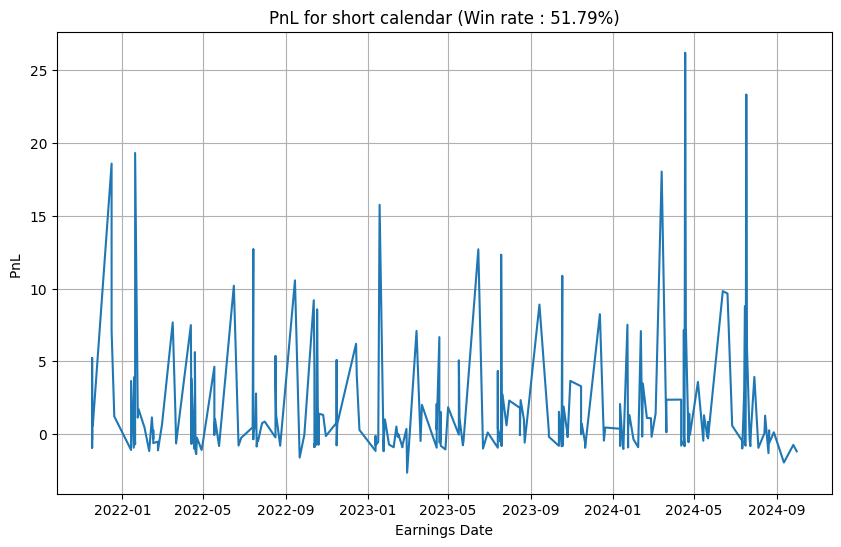

In [191]:
lowest_pnl_row_index = result['pnl'].idxmin()
lowest_pnl_row = result.loc[lowest_pnl_row_index]
print(lowest_pnl_row)

largest_pnl_row_index = result['pnl'].idxmax()
largest_pnl_row = result.loc[largest_pnl_row_index]
#print(largest_pnl_row)

plt.figure(figsize=(10, 6))
plt.plot(result['earning_date'],result['pnl'])
plt.xlabel('Earnings Date')
plt.ylabel('PnL ')
plt.title('PnL for short calendar (Win rate : 51.79%)')
plt.grid(True)
plt.show()

In [185]:
# Test the long calendar not hold
# number of days before earning report
result_long = pd.DataFrame()
before = 20
n = 1
bidask_spread = 1.1
cost = 0.02675 + 0.25
stock = ['ACN', 'ADBE', 'ANET', 'AXP', 'BK', 'DE', 'FDX', 'IBM', 'MS', 'PANW', 'PM', 'SLB', 'SNPS', 'USB', 'WMT']
for i in stock:
    for earning_date in df_earning_date_long["Earnings Date"][df_earning_date_long["Symbol"]==i]:
        closest_maturity = df_expiration_date.loc[(df_expiration_date - earning_date).abs().idxmin()] #+1
        longer_maturity = df_expiration_date.loc[(df_expiration_date - earning_date).abs().idxmin()+1] #+2
        if closest_maturity <= earning_date:
            closest_maturity = df_expiration_date.loc[(df_expiration_date - earning_date).abs().idxmin()+1] #+1
            longer_maturity = df_expiration_date.loc[(df_expiration_date - earning_date).abs().idxmin()+2] #+2
        if closest_maturity == pd.Timestamp("2024-11-15"):
            continue
        if longer_maturity >= pd.Timestamp("2024-10-20"):
            longer_maturity = closest_maturity
        result_long = pd.concat([result_long,long_calendar_spread_not_hold(i,earning_date,closest_maturity,longer_maturity,before, n,bidask_spread,cost)])

result_long['cumsum'] = result_long['pnl'].cumsum()
result_long= result_long.sort_values(by='trading_date')
result_long['cumsum'] = result_long['pnl'].cumsum()
result_long = result_long.reset_index(drop=True)
result_long['trading_date'] = pd.to_datetime(result_long['trading_date'])
result_long.to_excel('result_long_calendar_not_hold.xlsx')


/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2415806830.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  call_price = float(stock_price) * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(d1) - float(strike_price) * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(d2)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2415806830.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  put_price = float(strike_price) * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(-d2) - float(stock_price) * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(-d1)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2415806830.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError

In [186]:
winning_pct_long = 1-(len(result_long[result_long['pnl'] <0])/(len(result_long[result_long['pnl'] >0])+len(result_long[result_long['pnl'] <0])))
winning_pct_long

0.64

trading_date                      2023-11-01 00:00:00
closing_date                               2023-11-28
earning_date                      2023-11-29 00:00:00
calendar_contract              2023-12-15, 2024-01-19
stock name                                       SNPS
initial_cost                                 6.213476
cost for close the position                 -0.692958
calendar_cost                                5.520519
holding_period                                     19
pnl                                         -6.627519
t1                                                 32
t2                                                 57
vol                                           26.8564
vol1                                          31.0027
price                                          475.38
price1                                         543.73
cumsum                                     494.811652
Name: 123, dtype: object


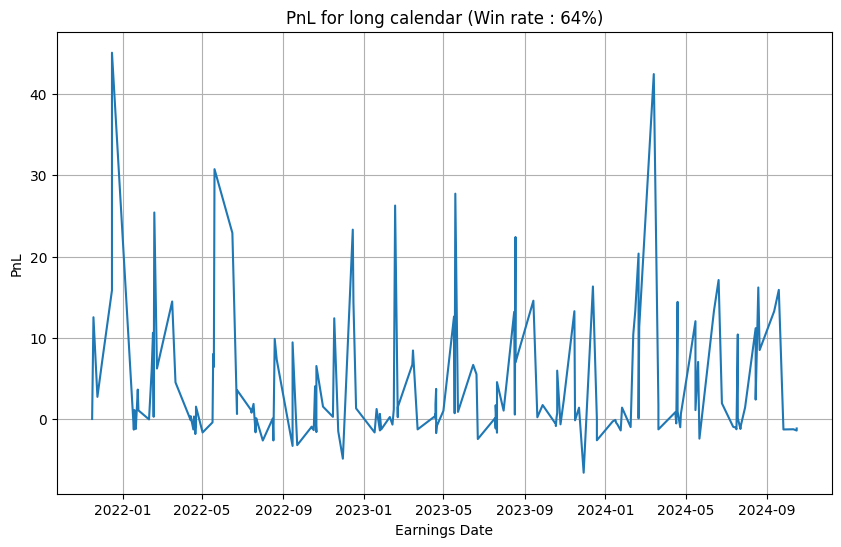

In [189]:
lowest_pnl_row_index = result_long['pnl'].idxmin()
lowest_pnl_row = result_long.loc[lowest_pnl_row_index]
print(lowest_pnl_row)

largest_pnl_row_index = result_long['pnl'].idxmax()
largest_pnl_row = result_long.loc[largest_pnl_row_index]
#print(largest_pnl_row)

plt.figure(figsize=(10, 6))
plt.plot(result_long['earning_date'],result_long['pnl'])
plt.xlabel('Earnings Date')
plt.ylabel('PnL')
plt.title('PnL for long calendar (Win rate : 64%)')
plt.grid(True)
plt.show()

In [16]:
class Portfolio:
    def __init__(self, cash):
        self.cash = cash
        self.equity = cash
        self.equity_history = [cash]  # Store the equity values over time
        self.options_equity = 0
        self.transactions = ['2021-11-08']# Store transaction details (date)
        self.max_options = min(1,int(self.equity*0.1 / 100))
        self.pnl_history = []

    def update_portfolio(self, options_pnl, cost, trading_date, expiration_date):
        self.equity += options_pnl*self.max_options
        self.options_equity += options_pnl*self.max_options
        self.transactions.append(trading_date)
        self.equity_history.append(self.equity.copy())

        # Update PNL history
        self.pnl_history.append(options_pnl)
    
    def execute_calendar_hold(self, stock_name, earnings_date, maturity_1, maturity_2, n, bidask_spread,cost):
        options_data = calendar_hold(stock_name, earnings_date, maturity_1, maturity_2,n,bidask_spread, cost)
        options_pnl = options_data['pnl']
        cost = options_data['calendar_cost']
        trading_date = options_data['trading_date']
        expiration_date = options_data['expiration date']
        self.update_portfolio(options_pnl, cost, trading_date, expiration_date)


    #Important
    def execute_short_calendar_not_hold(self, stock_name, earnings_date, maturity_1, maturity_2, n, after, bidask_spread,cost):
        options_data = short_calendar_not_hold(stock_name,earnings_date,maturity_1,maturity_2,n, after,bidask_spread,cost)
        options_pnl = options_data['pnl']
        cost = options_data['calendar_cost']
        trading_date = options_data['trading_date']
        expiration_date = options_data['closing_date']
        self.update_portfolio(options_pnl, cost, trading_date, expiration_date)

    #Important
    def execute_long_calendar_not_hold(self, stock_name, earnings_date, maturity_1, maturity_2,before, n, bidask_spread,cost):
        options_data = long_calendar_spread_not_hold(stock_name,earnings_date,maturity_1,maturity_2,before,n, bidask_spread,cost)
        options_pnl = options_data['pnl']
        cost = options_data['calendar_cost']
        trading_date = options_data['trading_date']
        expiration_date = options_data['closing_date']
        self.update_portfolio(options_pnl, cost, trading_date, expiration_date)
        
    def calculate_profit_loss(self):
        # Calculate total profit/loss including options equity
        total_options_pnl = self.options_equity
        total_pnl = total_options_pnl
        return total_pnl

In [17]:
ticker_symbol = '^GSPC'

# Fetch historical stock data for the specified date range
sp500_data = yf.download(ticker_symbol, start='2021-11-10', end='2024-11-06')
sp500_close_prices = sp500_data['Close']
sp500_close_df = pd.DataFrame(sp500_close_prices, columns=['Close'])
sp500_close_df.reset_index(inplace=True)
sp500_close_df.rename(columns={'Date': 'Time'}, inplace=True)
sp500_close_df['Time'] = pd.to_datetime(sp500_close_df['Time'])

# Display the extracted close prices
print(sp500_close_df["Time"])

[*********************100%***********************]  1 of 1 completed

0     2021-11-10
1     2021-11-11
2     2021-11-12
3     2021-11-15
4     2021-11-16
         ...    
746   2024-10-30
747   2024-10-31
748   2024-11-01
749   2024-11-04
750   2024-11-05
Name: Time, Length: 751, dtype: datetime64[ns]


/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/490106222.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  call_price = stock_price * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(d1) - strike_price * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(d2)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/490106222.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  put_price = strike_price * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(-d2) - stock_price * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(-d1)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/490106222.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.i

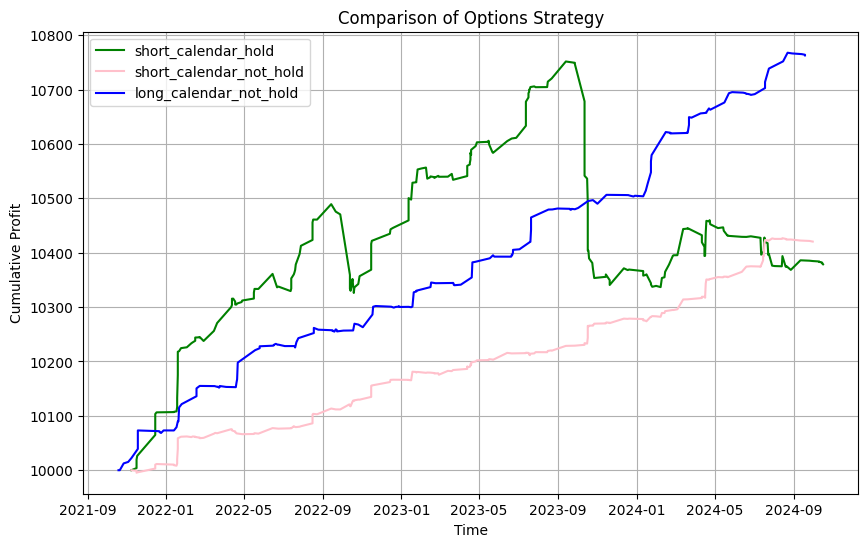

In [18]:
# Create a portfolio with the initial cash
my_portfolio_calendar_hold = Portfolio(10000)
my_portfolio_long_cal =Portfolio(10000)
my_portfolio_short_cal = Portfolio(10000)

# number of days before earning report
before = 20
after = 10
n1 =1
n = 2
bidask_spread = 1.1
cost = 0.02675 + 0.25
stock_short = ['ACN', 'ADBE', 'AMAT', 'ANET', 'AXP', 'BK', 'BLK', 'C', 'CSCO', 'CSX', 'HON', 'IBM', 'LOW', 'MS', 'NFLX', 'NKE', 'NVDA', 'PM', 'TGT', 'TJX', 'UNH', 'USB']
stock_long = ['ACN', 'ADBE', 'ANET', 'AXP', 'BK', 'DE', 'FDX', 'IBM', 'MS', 'PANW', 'PM', 'SLB', 'SNPS', 'USB', 'WMT']

for price in sp500_close_df["Close"]:
    trading_date = sp500_close_df['Time'][sp500_close_df["Close"] == price]
    extracted_dates = []
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(trading_date))
    extracted_dates.extend(dates)
    converted_dates = pd.to_datetime(extracted_dates[0])
    for date_value in df_earning_date_long["Earnings Date"]:
        if pd.to_datetime(date_value) == converted_dates:
            i = df_earning_date_long["Symbol"][df_earning_date_long["Earnings Date"] ==date_value]
            closest_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()] #+1
            longer_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+1] #+2
            if closest_maturity <= date_value:
                closest_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+1] #+1
                longer_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+2] #+2
            if closest_maturity == pd.Timestamp("2024-11-15"):
                continue
            if longer_maturity >= pd.Timestamp("2024-10-20"):
                longer_maturity = closest_maturity
            my_portfolio_long_cal.execute_long_calendar_not_hold(i.values[0],date_value,closest_maturity,longer_maturity,before,n1,bidask_spread, cost)

        else:
            continue

for price in sp500_close_df["Close"]:
    trading_date = sp500_close_df['Time'][sp500_close_df["Close"] == price]
    extracted_dates = []
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(trading_date))
    extracted_dates.extend(dates)
    converted_dates = pd.to_datetime(extracted_dates[0])
    for date_value in df_earning_date_short["Earnings Date"]:
        if pd.to_datetime(date_value) == converted_dates:
            i = df_earning_date_short["Symbol"][df_earning_date_short["Earnings Date"] ==date_value]
            closest_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()] #+1
            longer_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+1] #+2
            if closest_maturity <= date_value:
                closest_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+1] #+1
                longer_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+2] #+2
            if closest_maturity == pd.Timestamp("2024-11-15"):
                continue
            if longer_maturity >= pd.Timestamp("2024-10-20"):
                longer_maturity = closest_maturity
            my_portfolio_calendar_hold.execute_calendar_hold(i.values[0],date_value,closest_maturity,longer_maturity,n1,bidask_spread,cost)
        else:
            continue


for price in sp500_close_df["Close"]:
    trading_date = sp500_close_df['Time'][sp500_close_df["Close"] == price]
    extracted_dates = []
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(trading_date))
    extracted_dates.extend(dates)
    converted_dates = pd.to_datetime(extracted_dates[0])
    for date_value in df_earning_date_short["Earnings Date"]:
        if pd.to_datetime(date_value) == converted_dates:
            i = df_earning_date_short["Symbol"][df_earning_date_short["Earnings Date"] ==date_value]
            closest_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+1] 
            longer_maturity = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+2] 
            if closest_maturity == pd.Timestamp("2024-11-15"):
                continue
            if longer_maturity >= pd.Timestamp("2024-10-20"):
                longer_maturity = closest_maturity
            my_portfolio_short_cal.execute_short_calendar_not_hold(i.values[0],date_value,closest_maturity,longer_maturity,n1,after,bidask_spread, cost)

        else:
            continue

plt.figure(figsize=(10, 6))

equity_history_float = [float(item) for item in my_portfolio_calendar_hold.equity_history]
equity_history_array = np.array(equity_history_float)
extracted_dates = []
for item in my_portfolio_calendar_hold.transactions:
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(item))
    extracted_dates.extend(dates)
sorted_dates = sorted(extracted_dates)
converted_dates = pd.to_datetime(sorted_dates)
plt.plot(converted_dates, equity_history_array, color='g', linestyle='-',label='short_calendar_hold')

equity_history_float = [float(item) for item in my_portfolio_short_cal.equity_history]
equity_history_array = np.array(equity_history_float)
extracted_dates = []
for item in my_portfolio_short_cal.transactions:
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(item))
    extracted_dates.extend(dates)
sorted_dates = sorted(extracted_dates)
converted_dates = pd.to_datetime(sorted_dates)
plt.plot(converted_dates, equity_history_array, color='pink', linestyle='-',label='short_calendar_not_hold')

equity_history_float = [float(item) for item in my_portfolio_long_cal.equity_history]
equity_history_array = np.array(equity_history_float)
extracted_dates = []
for item in my_portfolio_long_cal.transactions:
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(item))
    extracted_dates.extend(dates)
sorted_dates = sorted(extracted_dates)
converted_dates = pd.to_datetime(sorted_dates)
plt.plot(converted_dates, equity_history_array, color='b', linestyle='-',label='long_calendar_not_hold')

plt.xlabel('Time')
plt.ylabel('Cumulative Profit')
plt.title('Comparison of Options Strategy')
plt.legend()
plt.grid(True)
plt.show()

In [199]:
equity_history_float = [float(item) for item in my_portfolio_short_cal.equity_history]
equity_history_array = np.array(equity_history_float)

a= pd.Series(equity_history_array)
a.pct_change().mean()*252 

/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/2509200475.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  equity_history_float = [float(item) for item in my_portfolio_short_cal.equity_history]


0.040883326624715596

In [200]:
a.pct_change().std()*(252**0.5)

0.006409189354752106

In [52]:
class CombinedPortfolio:
    def __init__(self, equity, stock_price,ratio, option_strategy):
        self.equity = {'Index Equity': equity*ratio, 'Options Equity': equity*(1-ratio)}
        self.equity_history = {'Index Equity': [equity*ratio], 'Options Equity': [equity*(1-ratio)]}
        self.total_equity_history = [equity]
        self.stock_price = stock_price
        self.shares = self.equity['Index Equity'] // stock_price
        self.profit_history = [0]
        self.transactions = []
        self.index_transaction =[]
        self.options_transaction =[]
        self.pnl_history = [0]  # Initialize P&L history with zero
        self.options_equity = 0
        self.max_options = int(equity* (1-ratio) / 100)
        self.option_strategy = option_strategy

    def update_stock_price(self, new_stock_price, trading_date):
        self.stock_price = new_stock_price
        self.transactions.append(trading_date)
        self.index_transaction.append(trading_date)

    def update_equity_portfolio(self):
        new_equity = self.shares * self.stock_price 
        pnl = new_equity - self.equity['Index Equity']
        self.equity['Index Equity'] += pnl
        self.equity_history['Index Equity'].append(self.equity['Index Equity'])
        self.pnl_history.append(pnl)
        # Update total equity history with the change in options equity
        total_options_equity = self.total_equity_history[-1]  # Get the previous day's total options equity
        total_options_equity += pnl
        self.total_equity_history.append(total_options_equity)

    def track_index_performance(self, new_stock_price):
        profit = (new_stock_price - self.stock_price) * self.shares
        self.profit_history.append(profit)
        self.stock_price = new_stock_price
        return profit

    def update_portfolio(self, options_pnl, cost, trading_date, expiration_date):
        self.equity['Options Equity'] += options_pnl * self.max_options / self.option_strategy
        self.options_equity += options_pnl * self.max_options / self.option_strategy
        self.equity_history['Options Equity'].append(self.equity['Options Equity'].copy())
        self.transactions.append(trading_date)
        self.options_transaction.append(trading_date)
        self.pnl_history.append(options_pnl)

        # Update total equity history with the change in options equity
        total_options_equity = self.total_equity_history[-1]  # Get the previous day's total options equity
        total_options_equity += options_pnl * self.max_options / self.option_strategy
        self.total_equity_history.append(total_options_equity)

    #Important
    def execute_long_calendar_not_hold(self, stock_name, earnings_date, maturity_1, maturity_2, before,n, bidask_spread,cost):
        options_data = long_calendar_spread_not_hold(stock_name,earnings_date,maturity_1,maturity_2,before,n, bidask_spread, cost)
        options_pnl = options_data['pnl'].values[0]
        cost = options_data['calendar_cost']
        trading_date =pd.Timestamp(options_data['trading_date'].values[0])
        expiration_date = options_data['closing_date']
        self.update_portfolio(options_pnl, cost, trading_date, expiration_date)
        
    #Important
    def execute_short_calendar_not_hold(self, stock_name, earnings_date, maturity_1, maturity_2, n, after, bidask_spread,cost):
        options_data = short_calendar_not_hold(stock_name,earnings_date,maturity_1,maturity_2,n, after,bidask_spread,cost)
        options_pnl = options_data['pnl'].values[0]
        cost = options_data['calendar_cost']
        trading_date =pd.Timestamp(options_data['trading_date'].values[0])
        expiration_date = options_data['closing_date']
        self.update_portfolio(options_pnl, cost, trading_date, expiration_date)

    def calculate_profit_loss(self):
        # Calculate total profit/loss including options equity
        total_options_pnl = self.options_equity
        total_pnl = total_options_pnl
        return total_pnl

In [53]:
sp500_stock_price = sp500_close_df["Close"][sp500_close_df["Time"] == pd.Timestamp('2021-11-10')].values[0]

long_portofolio = CombinedPortfolio(100000000,sp500_stock_price, 0.95,1)
short_portofolio = CombinedPortfolio(100000000,sp500_stock_price, 0.95,1)
index_portofolio = CombinedPortfolio(100000000,sp500_stock_price, 1,1)
total_portoflio = CombinedPortfolio(100000000,sp500_stock_price, 0.95,2)
# number of days before earning report
n1 = 1
before = 20
after = 1
bidask_spread = 5
cost = 0.02675 + 0.25

for price in sp500_close_df["Close"]:
    trading_date = sp500_close_df['Time'][sp500_close_df["Close"] == price]
    long_portofolio.update_stock_price(price, trading_date)
    short_portofolio.update_stock_price(price, trading_date)
    index_portofolio.update_stock_price(price, trading_date)
    total_portoflio.update_stock_price(price, trading_date)
    long_portofolio.update_equity_portfolio()
    short_portofolio.update_equity_portfolio()
    index_portofolio.update_equity_portfolio()
    total_portoflio.update_equity_portfolio()
    extracted_dates = []
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(trading_date))
    extracted_dates.extend(dates)
    converted_dates = pd.to_datetime(extracted_dates[0])
    for date_value in df_earning_date_long["Earnings Date"]:
        if pd.to_datetime(date_value) == converted_dates:
            i_long = df_earning_date_long["Symbol"][df_earning_date_long["Earnings Date"] ==date_value]
            closest_maturity_long = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()] #+1
            longer_maturity_long = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+1] #+2
            if closest_maturity <= date_value:
                closest_maturity_long = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+1] #+1
                longer_maturity_long = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+2] #+2
            if closest_maturity_long == pd.Timestamp("2024-11-15"):
                continue
            if longer_maturity_long >= pd.Timestamp("2024-10-20"):
                longer_maturity_long = closest_maturity_long
            long_portofolio.execute_long_calendar_not_hold(i_long.values[0],date_value,closest_maturity_long,longer_maturity_long,before,n1,bidask_spread, cost)
            total_portoflio.execute_long_calendar_not_hold(i_long.values[0],date_value,closest_maturity_long,longer_maturity_long,before,n1,bidask_spread, cost)
        else:
            continue
    for date_value in df_earning_date_short["Earnings Date"]:
        if pd.to_datetime(date_value) == converted_dates:
            i_short = df_earning_date_short["Symbol"][df_earning_date_short["Earnings Date"] ==date_value]
            closest_maturity_short = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+1] #+1
            longer_maturity_short = df_expiration_date.loc[(df_expiration_date - date_value).abs().idxmin()+2] #+2
            if closest_maturity_short == pd.Timestamp("2024-11-15"):
                continue
            if longer_maturity_short >= pd.Timestamp("2024-10-20"):
                longer_maturity_short = closest_maturity_short
            short_portofolio.execute_short_calendar_not_hold(i_short.values[0],date_value,closest_maturity_short,longer_maturity_short,n1,after,bidask_spread, cost)
            total_portoflio.execute_short_calendar_not_hold(i_short.values[0],date_value,closest_maturity_short,longer_maturity_short,n1,after,bidask_spread, cost)
        else:
            continue
        

/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/490106222.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  call_price = stock_price * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(d1) - strike_price * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(d2)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/490106222.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  put_price = strike_price * math.exp(-risk_free_rate * time_to_expiration) * norm.cdf(-d2) - stock_price * math.exp(-dividend_yield * time_to_expiration) * norm.cdf(-d1)
/var/folders/rr/glggxg997qbgnyw1d_r00sj80000gn/T/ipykernel_42434/490106222.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.i

In [54]:

long_history_float = np.array(long_portofolio.total_equity_history)
index_only_history_float = np.array(index_portofolio.total_equity_history)
short_history = np.array(short_portofolio.total_equity_history)
total_history = np.array(total_portoflio.total_equity_history)


In [175]:
def cum_return(x):
    return x.iloc[-1] /x.iloc[0]-1
def geo_return(x):
    return (x.iloc[-1] /x.iloc[0])** (252/752) -1
def annual_vol(x):
    return x.pct_change().std()*(252**0.5)
def mean_annual(x):
    result = x.pct_change().sum() / 752 *252
    return result
def sharpe_ratio(x):
    return (mean_annual(x) - 0.04) / annual_vol(x)
def mdd(x):
    return np.min(x/x.cummax()-1)
def calmar_ratio(x):
    return (mean_annual(x)-0.04) / abs(mdd(x))
def VaR(x):
    return -x.pct_change().quantile(0.05)
def cVaR(x):
    data = x.pct_change()
    return -data[data < data.quantile(0.05)].mean()

In [98]:
len(long_portofolio.transactions)
len(short_portofolio.transactions)
len(total_portoflio.transactions)
len(index_portofolio.transactions)

751

In [177]:
final_long = pd.Series(long_history_float)
final_short = pd.Series(short_history)
final_index = pd.Series(index_only_history_float)
final_total = pd.Series(total_history)

metrics_long = [cum_return(final_long),geo_return(final_long), mean_annual(final_long),annual_vol(final_long),sharpe_ratio(final_long),mdd(final_long),calmar_ratio(final_long),VaR(final_long)]
metrics_short = [cum_return(final_short),geo_return(final_short), mean_annual(final_short),annual_vol(final_short),sharpe_ratio(final_short),mdd(final_short),calmar_ratio(final_short),VaR(final_short)]
metrics_index = [cum_return(final_index),geo_return(final_index), mean_annual(final_index),annual_vol(final_index),sharpe_ratio(final_index),mdd(final_index),calmar_ratio(final_index),VaR(final_index)]
metrics_total = [cum_return(final_total),geo_return(final_total), mean_annual(final_total),annual_vol(final_total),sharpe_ratio(final_total),mdd(final_total),calmar_ratio(final_total),VaR(final_total)]

final_metrics_long = pd.DataFrame(metrics_long, index = ['Cumulative Return', 'Annualised Geometric Return', 'Annualised Return', 'Annualised Volatility', 'Sharpe Ratio', 'Maximum Drawdown', 'Calmar Ratio', 'VaR'], columns = ['Long Portfolio'])
final_metrics_short = pd.DataFrame(metrics_short, index = ['Cumulative Return', 'Annualised Geometric Return', 'Annualised Return', 'Annualised Volatility', 'Sharpe Ratio', 'Maximum Drawdown', 'Calmar Ratio', 'VaR'], columns = ['Short Portfolio'])
final_metrics_total = pd.DataFrame(metrics_total, index = ['Cumulative Return', 'Annualised Geometric Return', 'Annualised Return', 'Annualised Volatility', 'Sharpe Ratio', 'Maximum Drawdown', 'Calmar Ratio', 'VaR'], columns = ['Total Portfolio'])
final_metrics_index = pd.DataFrame(metrics_index, index=['Cumulative Return', 'Annualised Geometric Return', 
                                                         'Annualised Return', 'Annualised Volatility', 
                                                         'Sharpe Ratio', 'Maximum Drawdown', 
                                                         'Calmar Ratio', 'VaR'], columns=['S&P500 Index'])
final_metrics = pd.concat([final_metrics_long,final_metrics_short,final_metrics_total ,final_metrics_index], axis=1)


final_metrics.to_excel('final_final.xlsx')

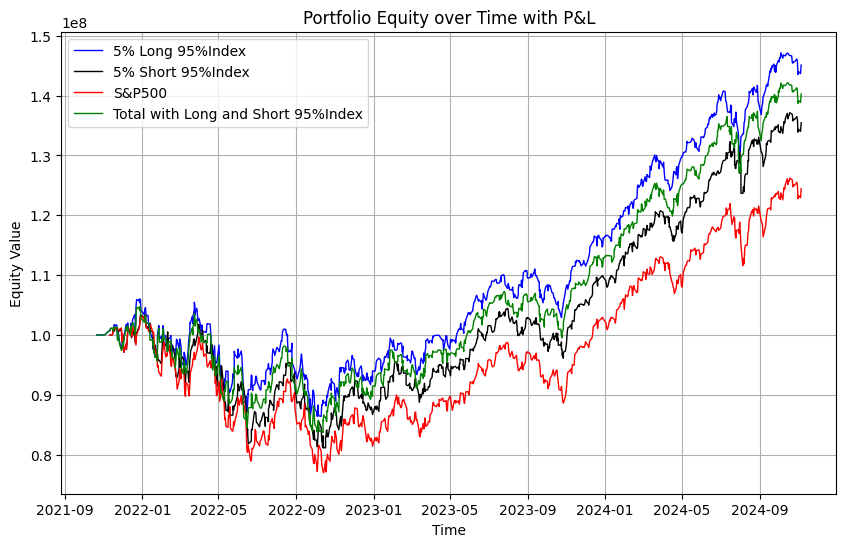

In [101]:
plt.figure(figsize=(10, 6))
extracted_dates = []
for item in long_portofolio.transactions:
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(item))
    extracted_dates.extend(dates)
sorted_dates = sorted(extracted_dates)
converted_dates = pd.to_datetime(sorted_dates)
plt.plot(converted_dates[1:],long_history_float, color='b', linestyle='-',label='5% Long 95%Index', linewidth=1)

extracted_dates = []
for item in short_portofolio.transactions:
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(item))
    extracted_dates.extend(dates)
sorted_dates = sorted(extracted_dates)
converted_dates = pd.to_datetime(sorted_dates)
plt.plot(converted_dates[1:],short_history, color='black', linestyle='-',label='5% Short 95%Index', linewidth=1)

extracted_dates = []
for item in index_portofolio.transactions:
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(item))
    extracted_dates.extend(dates)
sorted_dates = sorted(extracted_dates)
converted_dates = pd.to_datetime(sorted_dates)
plt.plot(converted_dates[1:],index_only_history_float, color='red', linestyle='-',label='S&P500', linewidth=1)

extracted_dates = []
for item in total_portoflio.transactions:
    dates = re.findall(r'\d{4}-\d{2}-\d{2}', str(item))
    extracted_dates.extend(dates)
sorted_dates = sorted(extracted_dates)
converted_dates = pd.to_datetime(sorted_dates)
plt.plot(converted_dates[1:],total_history, color='green', linestyle='-',label='Total with Long and Short 95%Index', linewidth=1)


plt.xlabel('Time')
plt.ylabel('Equity Value')
plt.title('Portfolio Equity over Time with P&L')
plt.legend()
plt.grid(True)
plt.show()